# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

# Loading Datasets

In [2]:
df=pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Airline\archive\baggagecomplaints.csv")

In [3]:
df

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581
...,...,...,...,...,...,...,...,...
247,United,08/2010,8,2010,14099,30637,344,4263211
248,United,09/2010,9,2010,9435,28072,161,3679517
249,United,10/2010,10,2010,9565,29144,140,3952549
250,United,11/2010,11,2010,8597,27318,104,3573268


In [4]:
df.shape

(252, 8)

In [5]:
df.columns

Index(['Airline', 'Date', 'Month', 'Year', 'Baggage', 'Scheduled', 'Cancelled',
       'Enplaned'],
      dtype='object')

In [6]:
df.Airline.value_counts()

American Eagle    84
Hawaiian          84
United            84
Name: Airline, dtype: int64

# Handling missing values

In [7]:
df.isnull().sum()

Airline      0
Date         0
Month        0
Year         0
Baggage      0
Scheduled    0
Cancelled    0
Enplaned     0
dtype: int64

# Handling Duplicates

In [8]:
df.drop_duplicates()

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581
...,...,...,...,...,...,...,...,...
247,United,08/2010,8,2010,14099,30637,344,4263211
248,United,09/2010,9,2010,9435,28072,161,3679517
249,United,10/2010,10,2010,9565,29144,140,3952549
250,United,11/2010,11,2010,8597,27318,104,3573268


# Removing Duplicates

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251    False
Length: 252, dtype: bool

# Handling Outliers

In [10]:
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Baggage'>

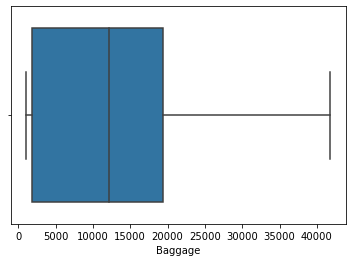

In [11]:
sns.boxplot(df['Baggage'])

# Model

In [12]:
x=df.drop(columns='Baggage')

In [13]:
y=df['Baggage']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [16]:
ohe=OneHotEncoder()
ohe.fit(x[['Airline','Date']])

OneHotEncoder()

In [17]:
ohe.categories_

[array(['American Eagle', 'Hawaiian', 'United'], dtype=object),
 array(['01/2004', '01/2005', '01/2006', '01/2007', '01/2008', '01/2009',
        '01/2010', '02/2004', '02/2005', '02/2006', '02/2007', '02/2008',
        '02/2009', '02/2010', '03/2004', '03/2005', '03/2006', '03/2007',
        '03/2008', '03/2009', '03/2010', '04/2004', '04/2005', '04/2006',
        '04/2007', '04/2008', '04/2009', '04/2010', '05/2004', '05/2005',
        '05/2006', '05/2007', '05/2008', '05/2009', '05/2010', '06/2004',
        '06/2005', '06/2006', '06/2007', '06/2008', '06/2009', '06/2010',
        '07/2004', '07/2005', '07/2006', '07/2007', '07/2008', '07/2009',
        '07/2010', '08/2004', '08/2005', '08/2006', '08/2007', '08/2008',
        '08/2009', '08/2010', '09/2004', '09/2005', '09/2006', '09/2007',
        '09/2008', '09/2009', '09/2010', '10/2004', '10/2005', '10/2006',
        '10/2007', '10/2008', '10/2009', '10/2010', '11/2004', '11/2005',
        '11/2006', '11/2007', '11/2008', '11/200

In [18]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Airline','Date']),remainder='passthrough')

In [19]:
lr=LinearRegression()

In [20]:
pipe=make_pipeline(column_trans,lr)

In [21]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['American Eagle', 'Hawaiian', 'United'], dtype=object),
                                                                            array(['01/2004', '01/2005', '01/2006', '01/2007', '01/2008', '01/2009',
       '01/2010', '02/2004', '02/2005', '02/2006', '02/2007', '02/2008',
       '02/2009', '02/2010', '03/2004'...
       '08/2009', '08/2010', '09/2004', '09/2005', '09/2006', '09/2007',
       '09/2008', '09/2009', '09/2010', '10/2004', '10/2005', '10/2006',
       '10/2007', '10/2008', '10/2009', '10/2010', '11/2004', '11/2005',
       '11/2006', '11/2007', '11/2008', '11/2009', '11/2010', '12/2004',
       '12/2005', '12/2006', '12/2007', '12/2008', '12/2009', '12/2010'],
      dtype=object)]),
                                           

In [22]:
y_pred=pipe.predict(x_test)

##### r2_score(y_test,y_pred)

In [23]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [24]:
np.argmax(scores)

820

In [25]:
scores[np.argmax(scores)]

0.9307088381878998

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8642789510931942

In [27]:
import pickle

In [28]:
pickle.dump(pipe,open('LinearRegression.pkl','wb'))

In [29]:
df.head()

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581


In [30]:
pipe.predict(pd.DataFrame([['American Eagle','01/2004',1,2004,38276,2481,992360]],columns=['Airline','Date','Month','Year','Scheduled','Cancelled','Enplaned']))

array([17035.19575545])

In [31]:
pipe.predict(pd.DataFrame([['American Eagle','01/2004',1,2004,35762,886,1060618]],columns=['Airline','Date','Month','Year','Scheduled','Cancelled','Enplaned']))

array([10242.51367746])